<a href="https://colab.research.google.com/github/ThakdanaiSaelee/Lab_CE888/blob/main/lab3%20-%20End-to-End/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.compose import ColumnTransformer
from time import perf_counter

**Load data and prepossing the data**

In [85]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/bank-additional-full.csv", delimiter=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [86]:
# Drop column duration
df = df.drop(labels='duration', axis=1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [88]:
# Use labelEncoder to convert text data to number
column = ['y']
label = LabelEncoder()
for column in column:
  df[column] = label.fit_transform(df[column])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [89]:
# No Nan value in data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

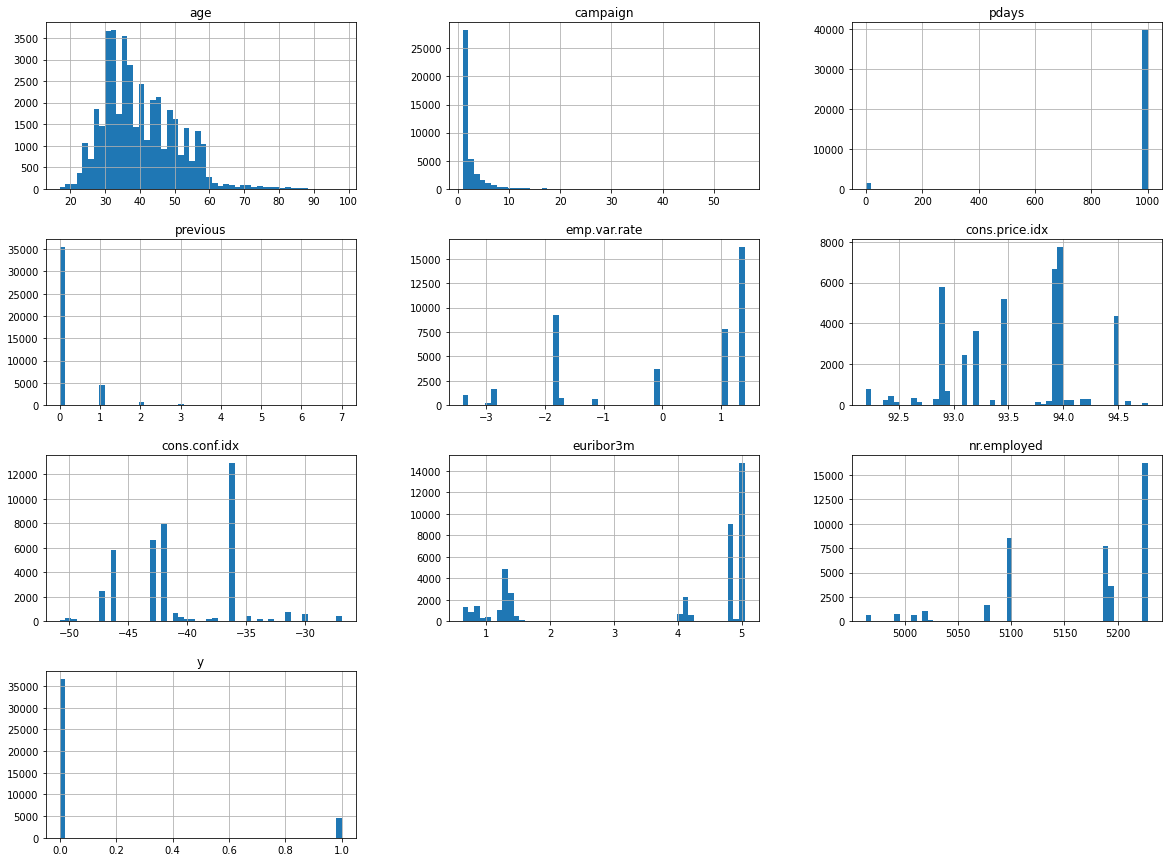

In [90]:
_ = df.hist(bins=50, figsize=(20,15))

12 columns are categorical features or 13 including output

In [91]:
# split catagory data to column
data = pd.get_dummies(df)
data

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0


In [92]:
print('Number of columns :', len(data.columns))

Number of columns : 63


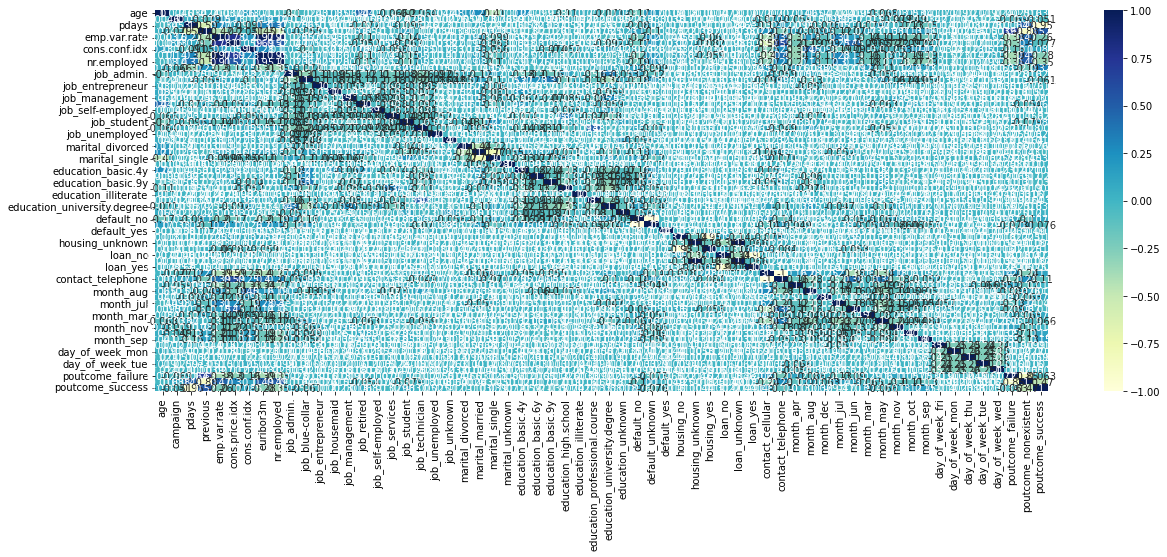

In [96]:
# Calculate the correlations between each pair of variables

correlations = data.corr()
#print(correlations['y'].sort_values(ascending=False))
# remove y from correlations
correlations_no_output = correlations.drop(labels = 'y', axis = 0)
correlations_no_output = correlations.drop(labels = 'y', axis = 1)

# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)
# YOUR CODE HERE
f, ax = plt.subplots(figsize=(20, 7))
ax = sns.heatmap(correlations_no_output, annot=True, center=0,  cmap="YlGnBu")

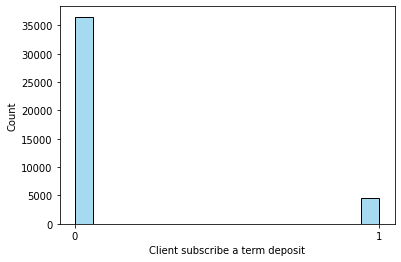

In [97]:
# plot histogram for output data
p = sns.histplot(data=data, x="y", color="skyblue")
p.set_xlabel("Client subscribe a term deposit")
p.set_xticks(range(0,2))

In [98]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [99]:
print('People who not subscribe a term deposit are',36548*100/(36548+4640),'% otherwise',4640*100/(36548+4640),'%')

People who not subscribe a term deposit are 88.73458288821988 % otherwise 11.26541711178013 %



**model the data**

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x = data.drop(labels='y', axis=1)
y = data['y']

In [103]:
# split data to training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50, stratify= y)

In [104]:
x, y = y_train.value_counts()
print('propotion of people who not subscribe a term deposit are %0.2f in training set' % (x/(x+y)))

propotion of people who not subscribe a term deposit are 0.89 in training set


In [105]:
x, y = y_test.value_counts()
print('propotion of people who not subscribe a term deposit are %0.2f in test set' % (x/(x+y)))

propotion of people who not subscribe a term deposit are 0.89 in test set


In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.dummy import DummyClassifier

In [74]:
def boost_random(clf,round,x_train,y_train):
  score = []
  for i in range(round):
    score.append(cross_val_score(clf, x_train, y_train, cv = 10, scoring='f1'))
  return np.mean(score), np.std(score)

Quiz

In [113]:
# answer question in quiz
randomforest = RandomForestClassifier(n_estimators=200, max_depth=8)
mean, std = boost_random(randomforest,1,x_train,y_train)

print("randomforest f1 score: %0.2f +/- %0.3f" % (mean, std))

randomforest f1 score: 0.30 +/- 0.041


In [114]:
# answer question in quiz
randomforest = RandomForestClassifier(n_estimators=100, max_depth=3)
mean, std = boost_random(randomforest,1,x_train,y_train)

print("randomforest f1 score: %0.2f +/- %0.3f" % (mean, std))

randomforest f1 score: 0.24 +/- 0.040


In [112]:
# answer question in quiz
randomforest = RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=60)
mean, std = boost_random(randomforest,1,x_train,y_train)

print("randomforest f1 score: %0.2f +/- %0.3f" % (mean, std))

randomforest f1 score: 0.30 +/- 0.046


In [111]:
from sklearn.metrics import f1_score

randomforest = RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=60)
randomforest.fit(x_train,y_train)
y_pred = randomforest.predict(x_test)
score = f1_score(y_test,y_pred)
print("randomforest f1 score: %0.2f" % (score))

randomforest f1 score: 0.33


In [115]:
randomforest = RandomForestClassifier(n_estimators=1000, max_depth=10)
randomforest.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [81]:
import pickle as pkl

outp = open('model.pkl', 'wb')
pkl.dump(randomforest, outp, -1)  # where clf is your classifier
outp.close()

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # 1. Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)  

# # get the folder id where you want to save your file
# file = drive.CreateFile()
# file.SetContentFile('model.pkl')
# file.Upload() 

In [84]:
from google.colab import drive

testset = pd.concat([x_test, y_test], axis=1, join="inner")

# drive.mount('/content/drive')
# path = '/content/drive/My Drive/testset.csv'

# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   testset.to_csv(f)

#testset.to_csv(index=False)
testset.to_csv('testset.csv', encoding = 'utf-8-sig') 


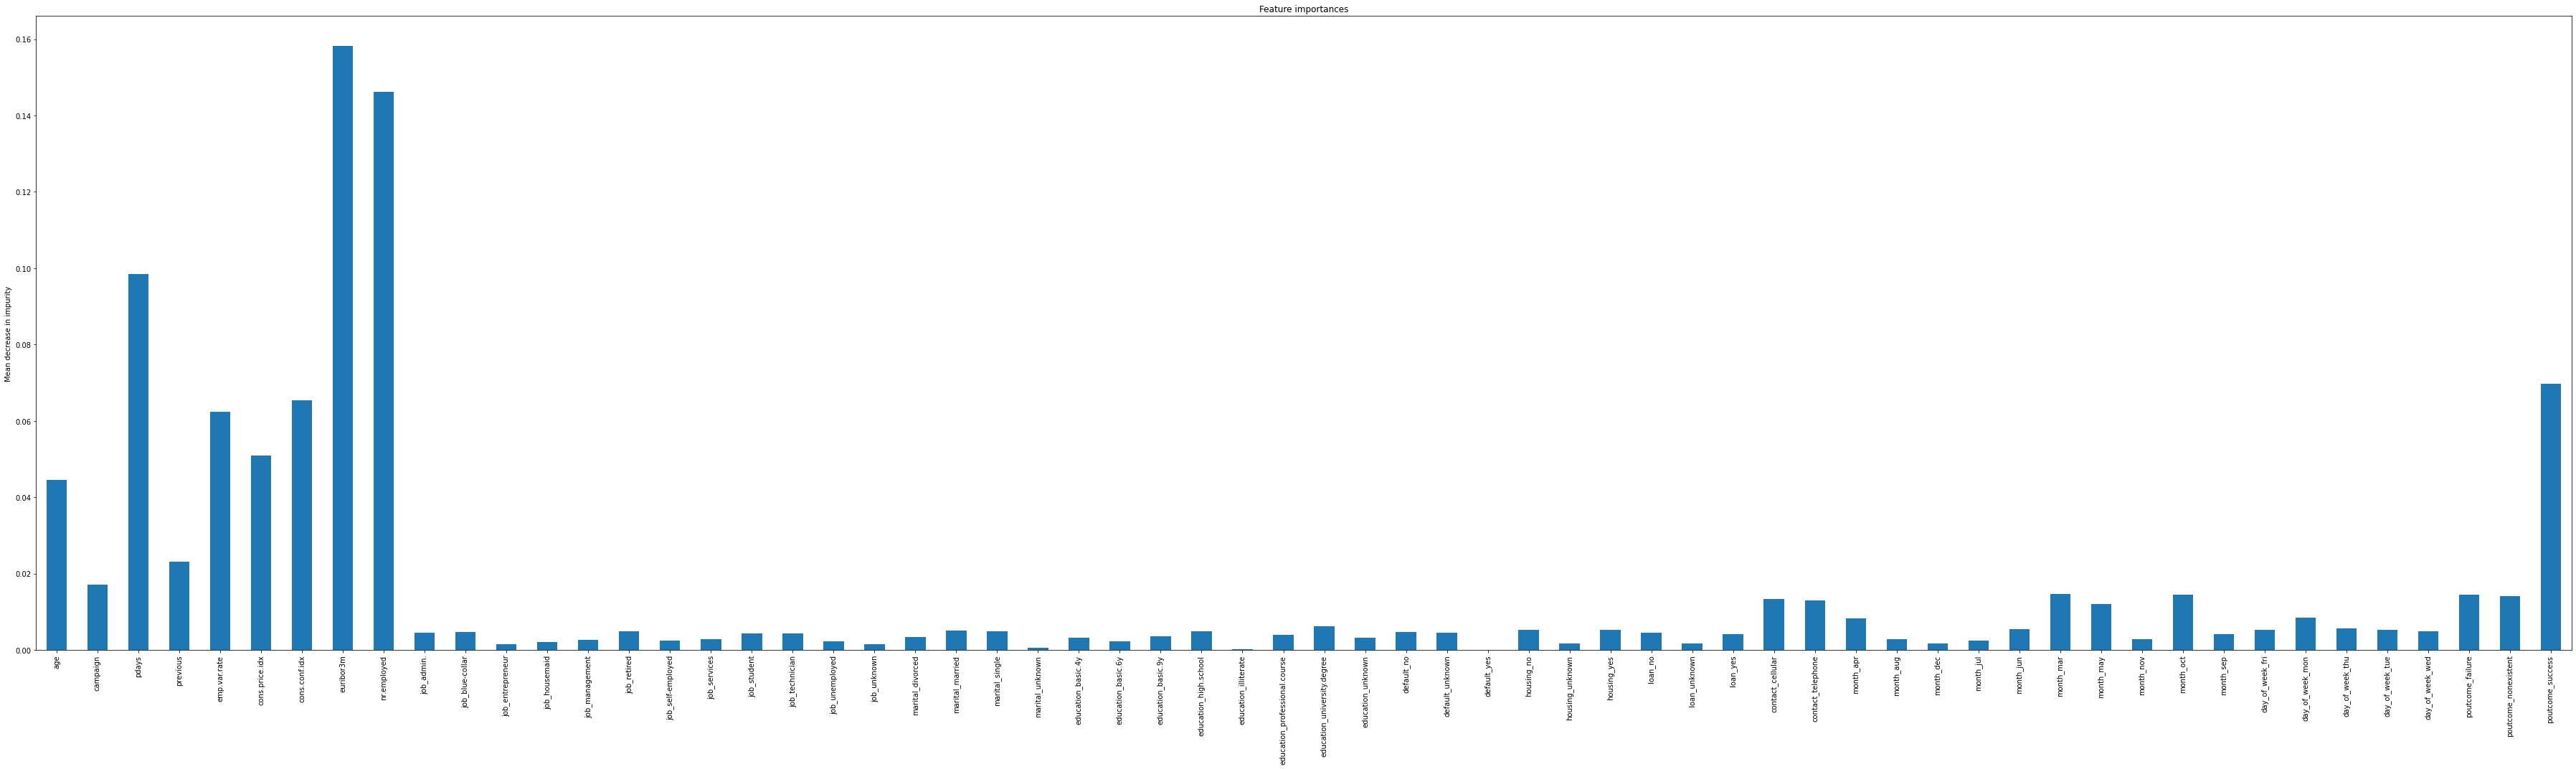

In [116]:
feature_name = x_train.columns
importances = randomforest.feature_importances_
forest_importances = pd.Series(importances, index=feature_name)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.set_figheight(15)
fig.set_figwidth(50)
fig.tight_layout()

age                     0.044489
campaign                0.017062
pdays                   0.098412
previous                0.023146
emp.var.rate            0.062422
                          ...   
day_of_week_tue         0.005296
day_of_week_wed         0.004852
poutcome_failure        0.014508
poutcome_nonexistent    0.014122
poutcome_success        0.069624
Length: 62, dtype: float64

In [38]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_scores = cross_val_score(dummy_clf, x_train, y_train, cv=10, scoring = 'f1')
print("dummy f1 score: %0.4f +/- %0.4f" % (dummy_scores.mean(), dummy_scores.std()))

dummy f1 score: 0.1125 +/- 0.0129


In [39]:
from sklearn.metrics import f1_score
randomforest = RandomForestClassifier(n_estimators=1000, max_depth=8)
randomforest.fit(x_train,y_train)
y_pre = randomforest.predict(x_test)
print('f1 score:',f1_score(y_test,y_pre))

f1 score: 0.3227848101265823


**Find the better model**

In [40]:
# find randomforest parameter by griddearchCV
randomforest = RandomForestClassifier()
n_estimators = np.arange(100,1001,100)
max_depth = np.arange(2,11,2)
parameter = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
}

t1_start = perf_counter()
model_random = GridSearchCV(estimator=randomforest, param_grid=parameter, n_jobs=-1, scoring='f1')
model_random.fit(x_train, y_train)
t1_stop = perf_counter()
print('Best parameters: ', model_random.best_params_)
print('Best score: ', model_random.best_score_)
print("Elapsed time during the whole program in seconds:", t1_stop-t1_start)

KeyboardInterrupt: ignored

In [41]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
feature = ['euribor3m','nr.employed']
x_df = df[feature].copy()
y_df = df['y'].copy()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=50)

In [ ]:
randomforest = RandomForestClassifier()
n_estimators = np.arange(100,501,100)
max_depth = np.arange(12,13,2)
parameter = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
}

t1_start = perf_counter()
model_random = GridSearchCV(estimator=randomforest, param_grid=parameter, n_jobs=-1, scoring='f1')
model_random.fit(x_train, y_train)
t1_stop = perf_counter()
print('Best parameters: ', model_random.best_params_)
print('Best score: ', model_random.best_score_)
print("Elapsed time during the whole program in seconds:", t1_stop-t1_start)

Best parameters:  {'max_depth': 12, 'n_estimators': 300}
Best score:  0.32115166728842137
Elapsed time during the whole program in seconds: 64.66467160899992


Clusstering

In [42]:
# create function for pac and standardize

def do_pca(data, component):
  pca_n = PCA(n_components = component)
  x_pca_n = pca_n.fit_transform(data)
  return x_pca_n

def standardize(data,output_column):
  df_x = data.drop(output_column, axis=1)
  num_features = list(df_x.columns)

  colTransformer = ColumnTransformer([('num', StandardScaler(), num_features)
                                      ],
                                    remainder='passthrough' 
                                    )

  x_processed = colTransformer.fit_transform(df_x)
  return x_processed


In [43]:
y = data['y']
x = standardize(data,'y')

# split data to training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [44]:
def find_best_component(round,data):
  f_score = []
  for i in range(1, round+1):
    x_pca = do_pca(data,i)
    kmean = KMeans(n_clusters=2)
    kmean.fit(x_pca)
    f_score.append(f1_score(y_train,kmean.labels_))
  return max(f_score), f_score.index(max(f_score))

In [45]:
score , index = find_best_component(10,x_train)
print('best score:',score,'best component is',index+1)

best score: 0.3521871283203383 best component is 3


In [46]:
x_train = do_pca(x_train,index+1)
x_test = do_pca(x_test,index+1)

kmean = KMeans(n_clusters=2)
kmean.fit(x_train)

score_test = f1_score(y_test,kmean.predict(x_test))
print('best score:',score_test)

best score: 0.3494539781591264


In [59]:
randomforest = RandomForestClassifier(n_estimators=250, max_depth=6)
randomforest.fit(x_train,y_train)
ypred = randomforest.predict(x_test)
score_test = f1_score(y_test,ypred)
print('best score:',score_test)

best score: 0.3410728582866293
